# Treino para as atividades

- [Atividade 5](http://mtm.ufsc.br/~douglas/2025.1/MTM410024_MTM3523/Atividade5.pdf)
- [Atividade 6](http://mtm.ufsc.br/~douglas/2025.1/MTM410024_MTM3523/Atividade6.pdf)

In [ ]:
using LinearAlgebra
using Plots
using Random

## Atividade 5

In [ ]:
X = rand(2,100)

2×100 Matrix{Float64}:
 0.451423  0.0381039  0.0722389  0.794947  …  0.128023  0.211885  0.667876
 0.616807  0.650088   0.874244   0.119732     0.474961  0.562093  0.254159

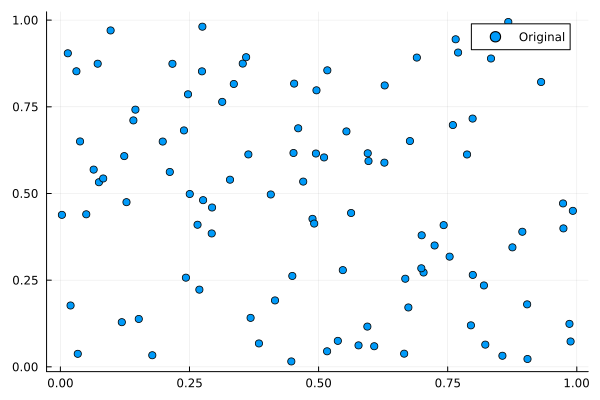

100×100 Matrix{Float64}:
 0.0        0.17194     0.210054    …  0.124707   0.0603718   0.178366
 0.17194    0.0         0.0514113      0.0387548  0.037943    0.553373
 0.210054   0.0514113   0.0            0.162539   0.11694     0.739289
 0.365092   0.854088    1.09159        0.570974   0.535643    0.0342174
 0.528383   1.17484     1.3974         0.858905   0.790823    0.117998
 0.185482   0.601583    0.488071    …  0.5985     0.430231    0.43599
 0.380893   0.768496    1.05145        0.48001    0.480591    0.0467133
 0.182217   0.585272    0.760714       0.372029   0.325518    0.00157481
 0.0529802  0.116118    0.07289        0.159389   0.0797554   0.425752
 0.206113   0.615796    0.485474       0.626938   0.452797    0.486362
 0.0543503  0.0680976   0.172957    …  0.0155626  0.00553502  0.23389
 0.27367    0.0652052   0.00425189     0.197276   0.156135    0.849774
 0.0495997  0.10164     0.221019       0.0276914  0.0172103   0.182183
 ⋮                                  ⋱             

In [ ]:
# Matriz de centralização
n = 100
J = I - (1/n)*ones(n,n);

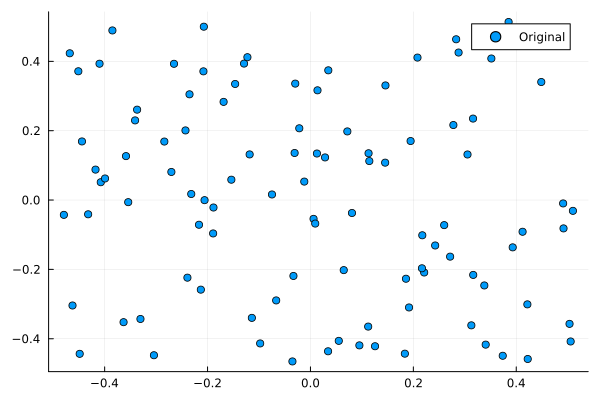

In [ ]:
Xc = X*J
gr()
scatter(Xc[1,:],Xc[2,:], label="Original")
# X estava em [0,1]^2, Xc está centralizada na origem

In [ ]:
D = matdis(X)
G = -(J*D*J)/2
G = (G+G')/2 # simetrizando

100×100 Matrix{Float64}:
  0.0193626    0.0366024   0.06597    -0.0586662  …   0.0193117   -0.0365126
  0.0366024    0.225782    0.248501   -0.199954       0.133736    -0.120806
  0.06597      0.248501    0.322632   -0.270283       0.142662    -0.16534
 -0.0586662   -0.199954   -0.270283    0.228397      -0.113807     0.140078
 -0.0639606   -0.283979   -0.346836    0.286531      -0.165045     0.174539
  0.0488627   -0.0559781   0.0492026  -0.0636821  …  -0.0433768   -0.0430837
 -0.065774    -0.156365   -0.249418    0.217502      -0.0854881    0.134624
 -0.0351621   -0.13348    -0.172776    0.144646      -0.0766779    0.0884665
  0.0499316    0.121572    0.191611   -0.166746       0.066679    -0.103147
  0.054192    -0.0474397   0.0661457  -0.0789556     -0.0390152   -0.0526253
  0.00949496   0.105831    0.101826   -0.0787477  …   0.0640376   -0.0469674
  0.0718345    0.279277    0.358178   -0.299249       0.160737    -0.18291
  0.00287803   0.0800675   0.0688027  -0.0511609      0.0492

Λ, Q

In [ ]:
Λ, Q = eigen(G, sortby=-); # Ordem decrescente

In [ ]:
relu(x) = (abs(x) + x)/2
rΛ = Diagonal(sqrt.(Λ[1:2]))

2×2 Diagonal{Float64, Vector{Float64}}:
 3.11864   ⋅ 
  ⋅       2.54592

In [ ]:
Xtil = rΛ*Q[:,1:2]'

2×100 Matrix{Float64}:
 -0.118985   -0.430097  -0.567592   …  -0.241671  -0.246067   0.292223
  0.0721471  -0.201986  -0.0216907     -0.258996  -0.138143  -0.0241509

In [ ]:
norm(matdis(Xtil) - matdis(X))

4.803308596168735e-14

In [ ]:
Xc

2×100 Matrix{Float64}:
 -0.0307838  -0.444102  -0.409967  …  -0.354183    -0.270321    0.18567
  0.135702    0.168983   0.393139     -0.00614371   0.0809878  -0.226946

## Vamos fazer dar erro

In [ ]:
D2 = [0 1 5; 1 0 1; 5 1 0] # Matrix que não respeita a distância euclidiana
# d12 = 1
# d21 = 1
# d23 = raiz(5) >

3×3 Matrix{Int64}:
 0  1  5
 1  0  1
 5  1  0

In [ ]:
J2 = I - (1/3)*ones(3,3)
G2 = -(J2*D2*J2)/2
G2 = (G2+G2')/2
eigen(G2) # tem um autovalor negativo não negligível

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 -0.1666666666666663
  1.3877787807814457e-16
  2.4999999999999964
vectors:
3×3 Matrix{Float64}:
 -0.408248  0.57735   0.707107
  0.816497  0.57735  -1.11022e-16
 -0.408248  0.57735  -0.707107

## Atividade 6

In [ ]:
using SparseArrays
function matrizBanda(n)
  A = spdiagm( 0 => 4*ones(n), 1=> -1*ones(n-1), -1 => -1*ones(n-1))
  return A
end

matrizBanda (generic function with 1 method)

10×10 SparseMatrixCSC{Float64, Int64} with 28 stored entries:
 4.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 1.0  4.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0  4.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0  4.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0  4.0  1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0  4.0  1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0  4.0  1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0  4.0  1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0  4.0  1.0
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0  4.0

In [ ]:
m = 5
D = blockdiag([T for i=1:m]...)

menosuns = spdiagm( -n => -ones(n*(m-1)), n => -ones(n*(m-1)))

D + menosuns
 # non null elements

50×50 SparseMatrixCSC{Float64, Int64} with 220 stored entries:
⎡⠻⣦⡀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢄⠀⠀⠈⠛⣤⡀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠑⢄⠀⠀⠈⠻⣦⡀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠑⢄⠀⠀⠈⠻⣦⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠻⣦⡀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠈⠻⣦⡀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠈⠛⣤⡀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠈⠻⣦⡀⠀⠀⠑⢄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠈⠻⣦⠀⠀⠀⠑⢄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠻⣦⡀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠈⠻⣦⡀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⠀⠀⠀⠈⠛⎦

In [ ]:
menosuns[1:15,1:15]

15×15 SparseMatrixCSC{Float64, Int64} with 10 stored entries:
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅   …   ⋅   -1.0    ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅   -1.0    ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅     ⋅   -1.0    ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅     ⋅     ⋅   -1.0    ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅     ⋅     ⋅     ⋅   -1.0
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅   …   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
 -1.0    ⋅     ⋅     ⋅     ⋅    ⋅    ⋅   …   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅   -1.0    ⋅     ⋅     ⋅    ⋅    ⋅       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  

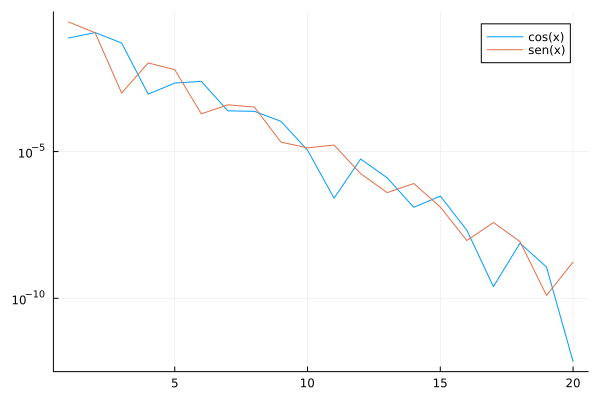

In [ ]:
x = 1:20
y = exp.(-x).*cos.(x + rand(20)).^2
z = exp.(-x).*sin.(x).^2
plot(x,y,yscale=:log10, label="cos(x)")
plot!(x,z,yscale=:log10, label="sen(x)")

## Gauss-Seidel Vetorial

In [1]:
using LinearAlgebra
using SparseArrays


In [24]:
function passoGS!(M,r,x)
  y = M\r
  x .= x + y
end

function GaussSeidel(A,b,x0; maxiter=1000,tol=1e-10)
  # Inicialização
  x = copy(x0)
  M = LowerTriangular(A)
  residuos = zeros(maxiter)
  for k=1:maxiter
    # Verifica convergência
    r = b-A*x
    res = norm(r)
    residuos[k] = res
    if res < tol
      return x, (passos=k-1, historico=residuos, residuo=res, convergiu=true)
    end
    # se não convergiu, faz um passo do algoritmo
    passoGS!(M,r,x)
  end
  return  x, (passos=maxiter, historico=residuos, residuo=norm(A*x-b), convergiu=false)
end

GaussSeidel (generic function with 1 method)

In [7]:
T(n) = sparse(Tridiagonal(ones(n-1), 4*ones(n), ones(n-1)))

function matrizproblema(n,m)
  D = blockdiag([ T(n) for i=1:m]...)
  menosuns = spdiagm( -n => -ones(n*(m-1)), n => -ones(n*(m-1)))
  D + menosuns
end

matrizproblema (generic function with 1 method)

In [35]:
m = 10
n = 2000
A = matrizproblema(n,m)
xs = ones(n*m);
x0 = zeros(n*m);
b = A*xs;

In [36]:
tempoGS1 = @elapsed xGS1, infoGS1 = GaussSeidel(A,b,x0;tol=1e-8);
infoGS1.passos, infoGS1.convergiu

(292, true)

In [37]:
tempoGS1

0.174895886